# Lab 1 - Used Cars in the USA
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

### Business Understanding:
As a team, we decided to work on a dataset which can easily be understood from our common life experience without needing specific domain knowledge such as finance, marketing and so forth. Secondly, we wanted to dabble ourselves with a dataset, that we had not previously exposed to, such as Real Estate, Life expectancy, etc. Off course, we must meet the project guidelines of 30,000 rows and 10 features, which in fact prompted us to look for somewhat large dataset with multiple features so that can effectively cull right set of features having numerical, boolean and categorical values. In addition, working with a large dataset would provide us with the experience that we have not acquired yet. This thought process of data selection has led us to grab “Used Car Dataset”, which has 3 million rows and 66 features. 
<br>
<br>
We wanted to build 3 different types of models on this dataset. First is Regression, second binary classification using Logistic Regression and third multiple classification using either K-nearest or K-means Random Forest depending on the best fit. We picked “Price” as the response feature for Regression model because it has numerical value and a pivotal point in the used car purchase. For Logistic Regression, we opted for “has_accidents” as the response variable because it has boolean values and an interesting point to observe whether we can effectively classify the used car with accidents. Finally, we used “body_type” as the target variable for multi-value classification. “Body_type” has 9 attributes which we believed a good candidate for multi-class classification. 
<br>
<br>
We applied first our domain knowledge, which is our collective experience of used car buying, to mine features that we thought would be relevant for making decision on a used car purchase. That helped us reduce the numbers of features from 66 to 40.  Then we took a close at each feature and tried to eliminate as many as possibleto keep the data size manageable so that we could handle data wrangling and model building, to be performed in the next phase, with the computing resources available to us. Also, we provided the justification as to why a feature was removed from the list of 40. However, we were cautious about categorical variable because itwould spawn to multiple variables after encoding. That is the key reason why we restricted the categorical feature to one. In the final dataset, we have 19 variables comprising 15 numerical, 1 boolean and 3 categorical. By the way, removing the missing values after sub-setting the data set to the intended features, we reduced the numbers of rows close to 700K from 3M. And we would also conduct PCA and Regularizations for dimensionality reduction. Based on the analysis and understanding of the data, we believed we selected the right set of data for the purpose of this project.

The general approach for the project is to build the model on the training data and
cross-validate the model on the test data to find it effectiveness. We would use
cross-validation technics such as k-fold etc. as appropriate. As noted earlier, we will
use the Regression technic for “Price” prediction. And the effectiveness measures to
be used to validate the Regression model are RMSE and CV Press.
The Area Under
the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic
regression model classifies positive and negative outcomes at all possible cutoffs.
Our objective is to find the right cut-off to maximize the area under ROC curve
(AUC). Off course, we will present the confusion matrix to know the misclassification
rate, recall and precision. Similarly, for multi-class classification, we will use
accuracy, recall and precision matrix to evaluate the effectiveness of the model.
Also, we will keep an eye on sensitivity and specificity so that we do not want to
build a model which is very either sensitive or specific.
<br>
<br>

In [2]:
#!pip install missingno
#!pip install plotnine
#pip install ptitprince

In [3]:
#importing libraries and reading in file
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignoring warnings

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
import ptitprince as pt

import sklearn.preprocessing as preprocessing
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

###### NOTE: need to change file per user

In [4]:
#df_raw = pd.read_csv('data/rawdata.csv')
#df_raw = pd.read_csv('https://raw.githubusercontent.com/chee154/ml-Py-used_cars/main/data/kaggle_used_cars_data.csv')
#df_raw = pd.read_csv('C:/Users/Queen/Documents/GitHub/ml-Py-used_cars/data/kaggle_used_cars_data.csv')
#df_raw = pd.read_csv(r'C:\Data\used_cars_data.csv')
df_raw = pd.read_csv('data/rawdata.csv')

In [5]:
df_raw.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [6]:
print("Total # of Records: " + str(df_raw.shape[0]))
print("Total # of Columns: " + str(df_raw.shape[1]))

Total # of Records: 3000040
Total # of Columns: 66


### Data Meaning Type

#### Domain based Attribute Reduction
Before we do a deep dive into the types of our data, we will first look into reducing it from a  The total dataset has 66 attributes After a quick observation of the column headers, we can deduce that not all columns will be necessary for our analysis. Reasons for removing them below:

subsetting columns by referencing the column indexes

In [7]:

df_cln_1 = df_raw.iloc[:, np.r_[0,5,7:11,13:17,18:21,22:30,32,35:38,42:50,51,55:57,61:63,64:66]]
print(df_cln_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 40 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vin                   object 
 1   body_type             object 
 2   city                  object 
 3   city_fuel_economy     float64
 4   combine_fuel_economy  float64
 5   daysonmarket          int64  
 6   engine_cylinders      object 
 7   engine_displacement   float64
 8   engine_type           object 
 9   exterior_color        object 
 10  frame_damaged         object 
 11  franchise_dealer      bool   
 12  franchise_make        object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  interior_color        object 
 20  isCab                 object 
 21  is_new                bool   
 22  length                object 
 23  listed_

### Data Quality

<AxesSubplot:>

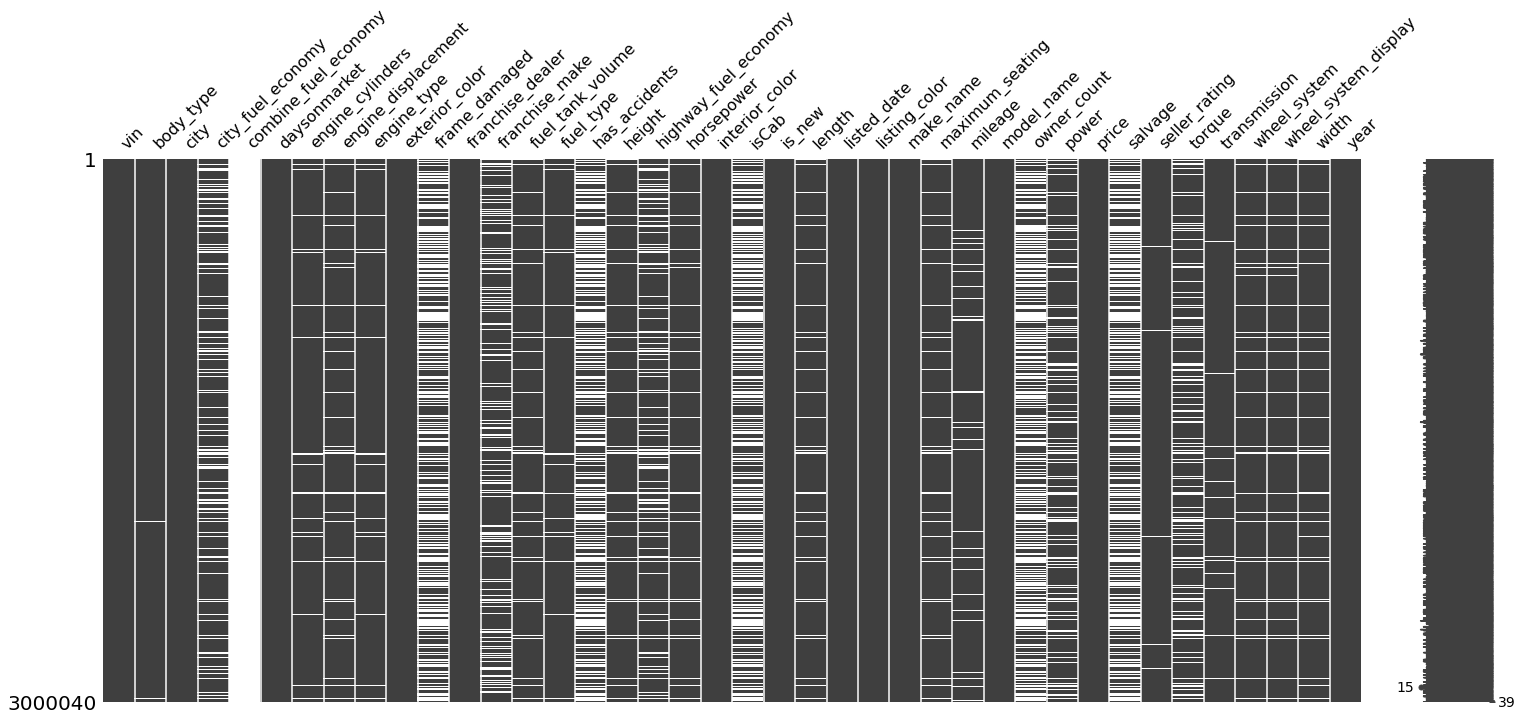

In [8]:
msno.matrix(df_cln_1)

After doing a quick profiling on some our identified columsn, we can see that both engine_cylinders and engine_type are the same. Additionally, we also found that the prefixes and suffixes attached to them are descriptive of it and thus not a continuous value. 

#### removing city_fuel_economy since a quick vizualition of our dataset shows that ALL values are empty

In [9]:

df_cln_1 = df_cln_1.drop(columns='combine_fuel_economy')
print(df_cln_1.shape[1])

39


We also found that 'engine_cylinders','engine_type' contains the same data in two separate columns, so we first test if this condition is true and if it is, we will remove one.

#### observing if 'engine_cylinders','engine_type' is the same data

In [10]:

if df_cln_1['engine_cylinders'].equals(df_cln_1['engine_type']) == True:
    df_cln_1 = df_cln_1.drop(columns='engine_cylinders')
    print(df_cln_1.shape[1])

38


We also found additional columns that were simply descriptions of another columns, for example. The 'wheel_system_display' attribute is simply a longer, more descriptive version of the 'wheel_system' attribute ("Front-Wheel Drive" vs "FWD"). For columns that follow this trend, we will remove the descriptive column from our dataset. 

In [11]:
print(df_cln_1[['wheel_system']])
print(df_cln_1[['wheel_system_display']])
df_cln_1 = df_cln_1.drop(columns='wheel_system_display')
print(df_cln_1.shape[1])

        wheel_system
0                FWD
1                AWD
2                AWD
3                AWD
4                AWD
...              ...
3000035          FWD
3000036          FWD
3000037          FWD
3000038          AWD
3000039          FWD

[3000040 rows x 1 columns]
        wheel_system_display
0          Front-Wheel Drive
1            All-Wheel Drive
2            All-Wheel Drive
3            All-Wheel Drive
4            All-Wheel Drive
...                      ...
3000035    Front-Wheel Drive
3000036    Front-Wheel Drive
3000037    Front-Wheel Drive
3000038      All-Wheel Drive
3000039    Front-Wheel Drive

[3000040 rows x 1 columns]
37


We also discussed that 'interior_color' attribute has 45,726 distinct color values and so due to the sheer volume and complexity (# of levels in this attribute). We also decided to remove it from our dataset since it is unrealistic for the type of modeling we are doing and would effect the overall performance of our model.

#note this plot takes forever to run
#(ggplot(df_cln_1)+aes(x="interior_color", y="price")+geom_line())

In [12]:
print(df_cln_1['interior_color'].nunique())

df_cln_1 = df_cln_1.drop(columns='interior_color')
print(df_cln_1.shape[1])

45726
36


Another attribute we found that could be removed as the "listed_date" attribute. Since there was no other 'datetype' attributes available in our dataset, we didn't really see a point with keeping it as there was no other data reference to use it with. Additionally, the attribute 'daysonmarket' already pre-aggregated the number of days it took to sell a vehicle, which the listed date would've been used for otherwise. Because of this, we will also remove it from our dataframe.

In [13]:
df_cln_1 = df_cln_1.drop(columns='listed_date')
print(df_cln_1.shape[1])

35


At this point, we decided to take a break from subsetting our data and take a look at the amount of missing values in the current dataframe. Our intention in mind was to see what the data looked like after it was cleaned to further proceed reducing the amount of attributes we had.

### Data Cleaning - Duplicates, Missing Data,  Nulls
Now that our datatypes have been adjusted. We will work on cleaning up any empty data in our dataset. To begin, we will check if any of the VINs have duplicates in the dataset, since this the VIN is unique to a car we are expecting there shouldn't be, but in cases there is, we will remove it.

In [14]:
df_cln_1[df_cln_1.duplicated(['vin'], keep=False)].sort_values('vin')

,vin,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,exterior_color,frame_damaged,franchise_dealer,...,owner_count,power,price,salvage,seller_rating,torque,transmission,wheel_system,width,year
2000032,1C3CCCBG4FN686074,Sedan,Deer Park,19.0,530,3600.0,V6,Blue,False,False,...,1.0,"295 hp @ 6,350 RPM",13488.0,False,4.453125,"262 lb-ft @ 4,250 RPM",A,FWD,73.6 in,2015
2000052,1C3CCCBG4FN686074,Sedan,Deer Park,19.0,530,3600.0,V6,Blue,False,False,...,1.0,"295 hp @ 6,350 RPM",13488.0,False,4.453125,"262 lb-ft @ 4,250 RPM",A,FWD,73.6 in,2015
2000043,1C6RR7FT5ES405345,Pickup Truck,Bonners Ferry,NaN,49,5700.0,V8,GRAY,False,False,...,1.0,"395 hp @ 5,600 RPM",20480.0,False,4.750000,"407 lb-ft @ 3,950 RPM",NaN,4WD,79.4 in,2014
2000023,1C6RR7FT5ES405345,Pickup Truck,Bonners Ferry,NaN,49,5700.0,V8,GRAY,False,False,...,1.0,"395 hp @ 5,600 RPM",20480.0,False,4.750000,"407 lb-ft @ 3,950 RPM",NaN,4WD,79.4 in,2014
1000038,1FA6P8TH0J5179933,Coupe,Groveport,21.0,7,2300.0,I4,Lightning Blue Metallic,False,False,...,1.0,"310 hp @ 5,500 RPM",24000.0,False,4.211765,"350 lb-ft @ 3,000 RPM",A,RWD,81.9 in,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000030,7FART6H88LE013181,SUV / Crossover,Westerville,40.0,28,2000.0,I4 Hybrid,Platinum White Pearl,NaN,False,...,NaN,"212 hp @ 6,200 RPM",33970.0,NaN,4.377049,NaN,CVT,AWD,73 in,2020
2000037,JTEBU5JR5K5687002,SUV / Crossover,Airway Heights,17.0,20,4000.0,V6,WHITE,False,False,...,NaN,"270 hp @ 5,600 RPM",44995.0,False,3.964286,"278 lb-ft @ 4,400 RPM",A,4WD,75.8 in,2019
2000057,JTEBU5JR5K5687002,SUV / Crossover,Airway Heights,17.0,20,4000.0,V6,WHITE,False,False,...,NaN,"270 hp @ 5,600 RPM",44995.0,False,3.964286,"278 lb-ft @ 4,400 RPM",A,4WD,75.8 in,2019
2000044,JTNK4RBE3K3044291,NaN,Colville,NaN,33,NaN,I4,BLACK,False,True,...,1.0,NaN,21000.0,False,4.583333,NaN,A,NaN,NaN,2019


We can see that that there are duplicates even though the 'vin' should be specific and distinct to each car. There is a total of 80 records that contain duplicates. We will then remove these duplicates while keeping the 'first' record so that one copy of the duplcites will remain. We can see that after we cleaned these duplicates, our total # of records drop from 3,000,040 to 3,000,000. 

In [15]:
print(df_cln_1.shape[0])

3000040


In [16]:
df_cln_1 = df_cln_1.drop_duplicates(subset=['vin'], keep='first')
print("# of records after removing duplicates: "+str(df_cln_1.shape[0]))

# of records after removing duplicates: 3000000


After we have cleaned our duplicates. A quick visualization of our data shows that almost every column has empty values. We will focus on analyzing those that have a large amount of empty data (ex. Frame_Damaged, has_accidents, isCab, etc.)

visualizatin of our data BEFORE removing all rows with missing data

<AxesSubplot:>

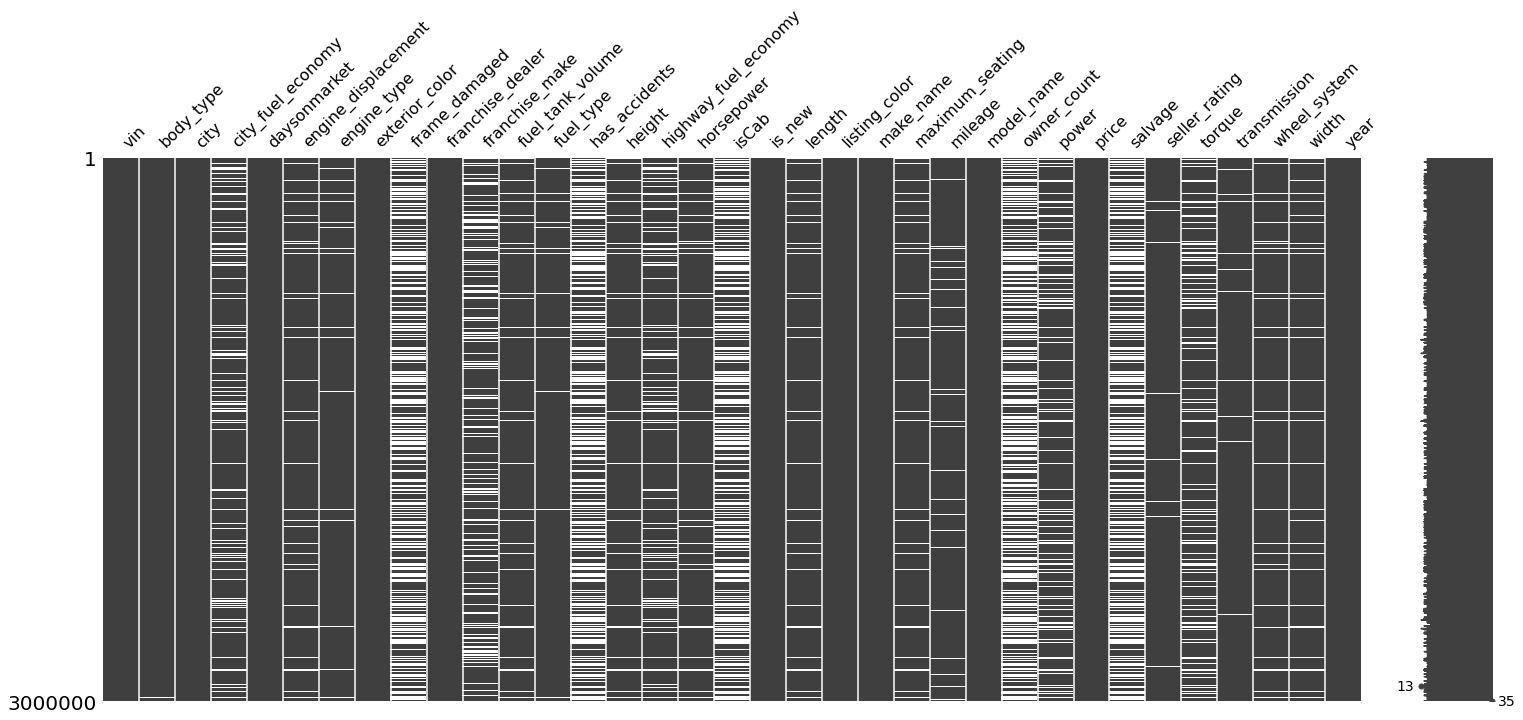

In [17]:
msno.matrix(df_cln_1)

remove the missing values

In [18]:
df_cln_2 = df_cln_1.dropna()
print(len(df_cln_2))

697989


checking the row counts of columns to see the missing rows

In [19]:
df_cln_2.count()

vin                     697989
body_type               697989
city                    697989
city_fuel_economy       697989
daysonmarket            697989
engine_displacement     697989
engine_type             697989
exterior_color          697989
frame_damaged           697989
franchise_dealer        697989
franchise_make          697989
fuel_tank_volume        697989
fuel_type               697989
has_accidents           697989
height                  697989
highway_fuel_economy    697989
horsepower              697989
isCab                   697989
is_new                  697989
length                  697989
listing_color           697989
make_name               697989
maximum_seating         697989
mileage                 697989
model_name              697989
owner_count             697989
power                   697989
price                   697989
salvage                 697989
seller_rating           697989
torque                  697989
transmission            697989
wheel_sy

visualizatin of our data AFTER removing all rows with missing data

<AxesSubplot:>

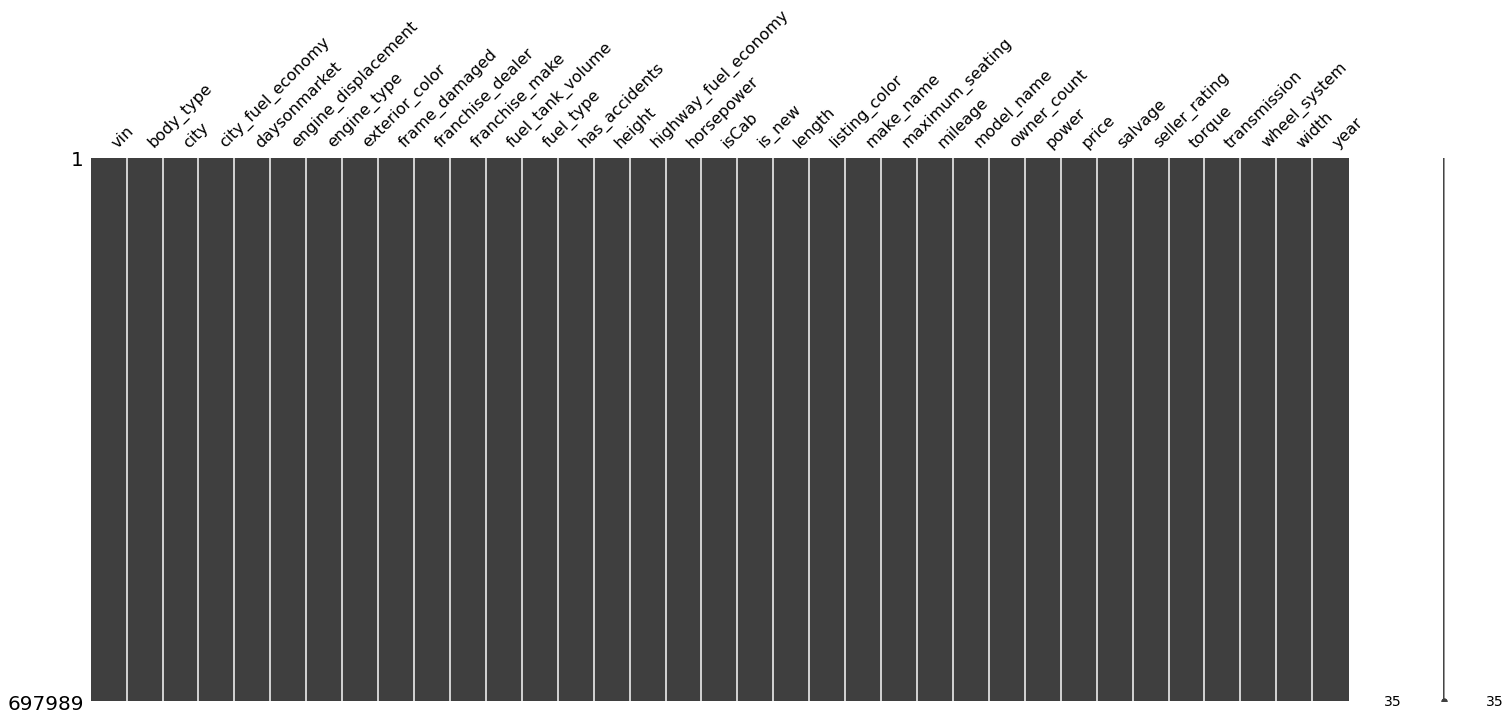

In [20]:

msno.matrix(df_cln_2)

We decided that since our original dataset was large (10gb with 3million records), that instead of imputing data based on the mean or other statistical types, that deleting all records with empty values still returned 700,000 total records that not only provides plenty of data leftover, but also raw data that isn't imputed. 

### Data Cleaning - Datatypes
Obviously at this point we need to convert a few of our data columns to the appropriate data type by removing parts of the value string that we do not need such as "gal" in the ful_tank_volume

Finding all unique values per column to see what values we need to clean

In [21]:
columns_that_need_cleaning = ['engine_type','exterior_color','frame_damaged','franchise_dealer','franchise_make','fuel_tank_volume','fuel_type','has_accidents','height','isCab','is_new','length','listing_color','make_name','maximum_seating','model_name','power','salvage','torque','transmission','wheel_system','width']
for col in columns_that_need_cleaning:
        print(df_cln_2[col].unique())

['I4' 'V6' 'V8' 'H4' 'I6' 'V8 Flex Fuel Vehicle' 'V6 Flex Fuel Vehicle'
 'I5' 'I4 Diesel' 'I4 Flex Fuel Vehicle' 'I4 Hybrid' 'V6 Diesel'
 'I6 Diesel' 'I3' 'W12 Flex Fuel Vehicle' 'V6 Biodiesel' 'V12' 'V10' 'W12'
 'H6' 'H4 Hybrid' 'V6 Hybrid' 'I4 Compressed Natural Gas' 'W16' 'R2'
 'I6 Hybrid' 'V6 Compressed Natural Gas']
['Silver Ice Metallic' 'Black' 'Diamond Black Crystal Pearlcoat' ...
 'VICTORIA BLACK' 'Modern S' 'Cosmic']
[False True]
[ True]
['Chevrolet' 'Jeep' 'Cadillac' 'Chrysler' 'Dodge' 'Kia' 'RAM' 'Mazda'
 'Audi' 'Hyundai' 'Ford' 'Toyota' 'Lincoln' 'Volvo' 'GMC' 'Volkswagen'
 'BMW' 'Lexus' 'Buick' 'Subaru' 'Scion' 'Honda' 'Acura' 'Nissan'
 'INFINITI' 'Porsche' 'Rolls-Royce' 'Lamborghini' 'Bentley'
 'Mercedes-Benz' 'Jaguar' 'Land Rover' 'Maserati' 'Ferrari' 'MINI' 'FIAT'
 'Alfa Romeo' 'Mitsubishi' 'Aston Martin' 'Lotus' 'McLaren' 'SRT'
 'Genesis' 'smart' 'Shelby' 'Pagani']
['15.8 gal' '17.4 gal' '19.4 gal' '22 gal' '24.6 gal' '13.5 gal'
 '13.2 gal' '15.9 gal' '12.7 gal' '22.5

['160 hp @ 5,700 RPM' '311 hp @ 6,600 RPM' '310 hp @ 6,800 RPM' ...
 '420 hp @ 7,000 RPM' '340 hp @ 6,400 RPM' '168 hp @ 5,500 RPM']
[False True]
['184 lb-ft @ 2,500 RPM' '280 lb-ft @ 4,800 RPM' '266 lb-ft @ 2,800 RPM'
 ... '267 lb-ft @ 4,800 RPM' '220 lb-ft @ 3,800 RPM'
 '177 lb-ft @ 4,500 RPM']
['A' 'M' 'CVT' 'Dual Clutch']
['FWD' 'AWD' '4WD' 'RWD' '4X2']
['73 in' '81.5 in' '78.6 in' '78.5 in' '84.8 in' '71.4 in' '70.9 in'
 '83.5 in' '73.6 in' '79.6 in' '82.8 in' '85.5 in' '73.8 in' '75 in'
 '80 in' '70.8 in' '74.6 in' '82.5 in' '73.2 in' '90.2 in' '93.8 in'
 '81.3 in' '71.8 in' '84.3 in' '80.5 in' '72.8 in' '78.1 in' '90.4 in'
 '72.4 in' '74.7 in' '69.9 in' '73.7 in' '71.2 in' '83.9 in' '77.2 in'
 '76.7 in' '74.4 in' '75.2 in' '81.9 in' '81.2 in' '85.6 in' '69 in'
 '88.5 in' '72 in' '77.5 in' '79.5 in' '72.3 in' '78.9 in' '73.4 in'
 '79.3 in' '69.2 in' '72.9 in' '72.2 in' '80.3 in' '75.5 in' '70.1 in'
 '77.7 in' '71.1 in' '71.7 in' '80.8 in' '85.8 in' '72.6 in' '72.5 in'
 '67.8 in' 

finding all unique values per column to see what values we need to clean

In [22]:
columns_that_need_cleaning_2 = ['fuel_tank_volume','height','length','maximum_seating','width',]
for col in columns_that_need_cleaning_2:
        print(df_cln_2[col].unique())

['15.8 gal' '17.4 gal' '19.4 gal' '22 gal' '24.6 gal' '13.5 gal'
 '13.2 gal' '15.9 gal' '12.7 gal' '22.5 gal' '21.5 gal' '18.5 gal'
 '26 gal' '12.4 gal' '19.2 gal' '18.6 gal' '23.2 gal' '24 gal' '16.4 gal'
 '13.7 gal' '19 gal' '14.5 gal' '14 gal' '18 gal' '16.9 gal' '21 gal'
 '19.5 gal' '31 gal' '18.8 gal' '16 gal' '16.6 gal' '21.7 gal' '20 gal'
 '15.3 gal' '22.2 gal' '17.2 gal' '21.1 gal' '16.1 gal' '13 gal'
 '23.8 gal' '17 gal' '15.1 gal' '19.8 gal' '23 gal' '20.5 gal' '11.9 gal'
 '14.2 gal' '14.3 gal' '14.8 gal' '17.7 gal' '16.5 gal' '17.8 gal'
 '15.6 gal' '17.1 gal' '15.5 gal' '10.6 gal' '15.7 gal' '18.1 gal'
 '20.1 gal' '12.8 gal' '20.3 gal' '21.6 gal' '21.9 gal' '11.4 gal'
 '36 gal' '16.8 gal' '15.4 gal' '16.3 gal' '28.3 gal' '17.9 gal'
 '27.7 gal' '13.6 gal' '17.5 gal' '28 gal' '27 gal' '22.4 gal' '20.6 gal'
 '26.4 gal' '11.6 gal' '11.8 gal' '12 gal' '19.3 gal' '13.1 gal'
 '10.8 gal' '14.9 gal' '19.1 gal' '12.1 gal' '27.3 gal' '38 gal'
 '11.3 gal' '32 gal' '10 gal' '23.3 gal' '2

Regarding fuel_tank_volume and maximum_seating, we can see that there appears to be a pattern in the suffixes, "gal" and "seats" accordingly. We will now remove them and then convert all values to numeric.

removing unecesary string values in columns
then cleaning up any values that contain '--' and replacing it with NaN
Lastly, converting the value first to a string type and then to a float type

In [23]:
df_cln_2['fuel_tank_volume']=df_cln_2['fuel_tank_volume'].astype(str).str.replace(' gal', '').replace('--',np.NaN).astype(float)
df_cln_2['height']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['length']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['maximum_seating']=df_cln_2['maximum_seating'].astype(str).str.replace(' seats', '').replace('--',np.NaN).astype(float)
df_cln_2['width']=df_cln_2['width'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)

#### doing a quick profile on the subsetted columns

In [24]:
print(df_cln_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697989 entries, 38 to 3000039
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   697989 non-null  object 
 1   body_type             697989 non-null  object 
 2   city                  697989 non-null  object 
 3   city_fuel_economy     697989 non-null  float64
 4   daysonmarket          697989 non-null  int64  
 5   engine_displacement   697989 non-null  float64
 6   engine_type           697989 non-null  object 
 7   exterior_color        697989 non-null  object 
 8   frame_damaged         697989 non-null  object 
 9   franchise_dealer      697989 non-null  bool   
 10  franchise_make        697989 non-null  object 
 11  fuel_tank_volume      697819 non-null  float64
 12  fuel_type             697989 non-null  object 
 13  has_accidents         697989 non-null  object 
 14  height                697882 non-null  float64
 15

We can now see that all of our column values have been adjusted to the correct datatypes. We will next proceed with cleaning up the remainder of our data attributes. A quick count on our datatypes shows us that we still have 19 categorical values, 14 numerical types and 2 booleans (true/false) left to work wikth. Since our ultimate goal is doing a regression and one classification model, we will next work on trimming down our 'object' categorical data types.

#### count of datatypes in current dataframe

In [25]:
print(df_cln_2.dtypes.value_counts())
print("---------------------------------------------")
#showing only the object type columns
print(df_cln_2.select_dtypes(include='object').columns)

object     18
float64    13
bool        2
int64       2
dtype: int64
---------------------------------------------
Index(['vin', 'body_type', 'city', 'engine_type', 'exterior_color',
       'frame_damaged', 'franchise_make', 'fuel_type', 'has_accidents',
       'isCab', 'listing_color', 'make_name', 'model_name', 'power', 'salvage',
       'torque', 'transmission', 'wheel_system'],
      dtype='object')


After the team decided to choose 'body_type' as main the main classification term. We decided to create a final dataframe with only the attributes we found useful for our model which excludes:
- **'vin'**: acts as primary index but not useful for modeling
<br>
- **'city'**: no model of ours will require geographic features, also since there is not state or zip attributes, it is ambiguous
<br>
- **'engine_type'**: use for EDA but 'horsepower' is the continous version of this attribute
<br>
- **'franchise_dealer'**: not useful for our model 
<br>
- **'franchise_make'**: same as 'make_name' which has too many levels as a categorical value and not necessary for our predictin model
<br>
- **'fuel_tank_volume'**: 
<br>
- **'fuel_type'**: 
<br>
- **'isCab'**:
<br>
- **'listing_color'**: 
<br>
- **'make_name'**: 
<br>
- **'model_name'**: 
<br>
- **'power'**: 'horsepower' attribute will be used instead
<br>
- **'salvage'**: the value that is associated with depreciation number which is more of accounting. In real world, we pay what is the market value of the car.
<br>
- **'torque'**:  'horsepower' attribute will be used instead
<br>
- **'transmission'**: 
<br>
- **'wheel_system'**: 

In [26]:
df_cln_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697989 entries, 38 to 3000039
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   697989 non-null  object 
 1   body_type             697989 non-null  object 
 2   city                  697989 non-null  object 
 3   city_fuel_economy     697989 non-null  float64
 4   daysonmarket          697989 non-null  int64  
 5   engine_displacement   697989 non-null  float64
 6   engine_type           697989 non-null  object 
 7   exterior_color        697989 non-null  object 
 8   frame_damaged         697989 non-null  object 
 9   franchise_dealer      697989 non-null  bool   
 10  franchise_make        697989 non-null  object 
 11  fuel_tank_volume      697819 non-null  float64
 12  fuel_type             697989 non-null  object 
 13  has_accidents         697989 non-null  object 
 14  height                697882 non-null  float64
 15

#### creating final df for analysis

In [27]:
df_final = df_cln_2.iloc[:, np.r_[1,3:6,8,13,14:17,18:20,22:24,25,27,29,33:35]]
print(df_final.info())
print(df_final.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697989 entries, 38 to 3000039
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             697989 non-null  object 
 1   city_fuel_economy     697989 non-null  float64
 2   daysonmarket          697989 non-null  int64  
 3   engine_displacement   697989 non-null  float64
 4   frame_damaged         697989 non-null  object 
 5   has_accidents         697989 non-null  object 
 6   height                697882 non-null  float64
 7   highway_fuel_economy  697989 non-null  float64
 8   horsepower            697989 non-null  float64
 9   is_new                697989 non-null  bool   
 10  length                697882 non-null  float64
 11  maximum_seating       697884 non-null  float64
 12  mileage               697989 non-null  float64
 13  owner_count           697989 non-null  float64
 14  price                 697989 non-null  float64
 15

### Simple Statistics

##### Look at the final data, we have total 18 columns, their data types are: bool(1), float64(12), int64(2), object(3).

As our main goal is to predict car price and car type,in the simple statistics we need to find out the 5 most significant attributes that affect the car price, which's divided to below 4 steps:
<br>
<br>
1. Check the data range, mode, mean, median, variance and counts, etc
<br>
2. Check data normality
<br>
3. Correlation check
<br>
4. With the result from correlation checking,the 5 most significan attributes are horsepower(0.629),mileage(-0.43),highway_fuel_economy(-0.401), year(0.371) and engine_displacement(0.427)
<br>
<br>
An interesting thing we found is that the seller_rating and owner_count don't show strong relationship to car price from correlation checking, they're only -0.219 and -0.035

#### Median, Standard Deviation, Mean in a Pandas Dataframe
We can see from observing the simple statistic is that the median price aligns with the IQR as most of the cars are priced at around 21700. However, what's interesting to note here is that the though the median and the mean are somewhat similar, there is a standard deviation of about 15878. This could be due to the fact that the extremities in car pricing varies greatly from the average with the lost car priced at 484 while the highest price car is at 3299995. 

In [28]:
print(df_final['price'].aggregate([np.median, np.std, np.mean]).reset_index())
print('min: '+str(df_final['price'].min()))
print('min: '+str(df_final['price'].max()))

    index         price
0  median  21700.000000
1     std  15878.458032
2    mean  24434.421728
min: 484.0
min: 3299995.0


#### Check the count of new cars

In this section, we do a quick check to see the count of used cars and new cars. We then covert that into percentage for further analysing in the later section.

There are 667 new cars in the our dataset. For used cars, we have a total of 697322 cars.
In other words, about 99.9% of our dataset are used cars, whereas new car is less than 1%.


In [68]:
##percentage of used cars and new cars
print('count of new cars:'+str(df_final['is_new'].values.sum()))
print('count of used cars: '+str((~df_final['is_new']).values.sum()))
perN=(667/697989)*100
print('percentage of new cars:'+str(perN)+'%')
perO=(697322/697989)*100
print('percentage of old cars:'+str(perO)+'%')

count of new cars:667
count of used cars: 697322
percentage of new cars:0.09556024521876419%
percentage of old cars:99.90443975478124%


#### Distribution of Car Prices

Since one of our primary areas of analysis is centered around the pricing of a car, we will next look deeper into this attribute. From a simple IQR distribution, we can see that similar to that of the mean and median, the majority of the data is within a relative standard deviation comparing how small the variance is between 25%, 50% and 75% IQRs.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

<Figure size 1440x1080 with 0 Axes>

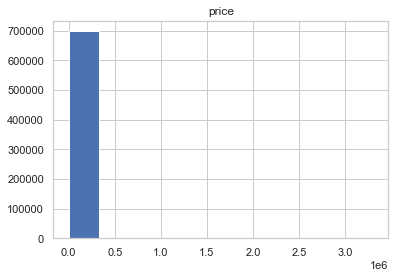

In [63]:
#Histogram the original without removing the outliers.
plt.figure(figsize=(20,15))
df_final.hist(column='price')

25%    16230.0
50%    21700.0
75%    29999.0
Name: price, dtype: float64
3299995.0


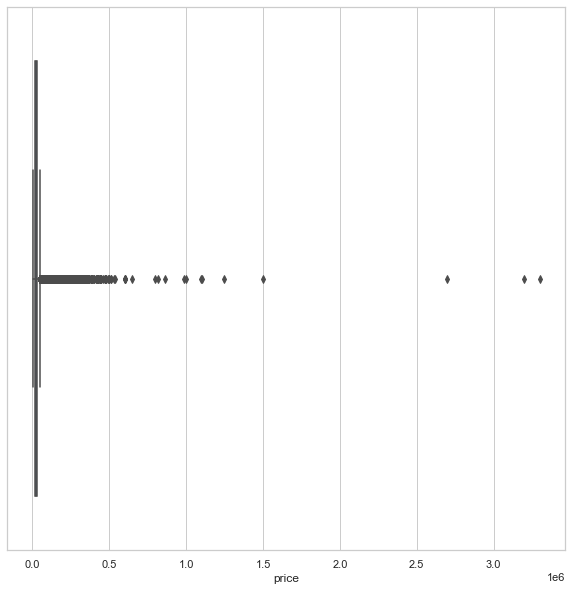

In [31]:
##Analyze the box plot without getting rid of outliers
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_final["price"])
print(df_final.describe()['price'][['25%', '50%', '75%']])
print(df_final.max()['price'])

After checking the above plots, we decided to remove all outliers with price over 30000, there are total 524044 numbers of cars.

We filter down all data less than 30000, then replot it so that the outliers disapear and we can see the boxplot better.


In [64]:
df_filter=df_final.query('price<30000')
print(df_filter.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 524044 entries, 38 to 3000039
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             524044 non-null  object 
 1   city_fuel_economy     524044 non-null  float64
 2   daysonmarket          524044 non-null  int64  
 3   engine_displacement   524044 non-null  float64
 4   frame_damaged         524044 non-null  object 
 5   has_accidents         524044 non-null  object 
 6   height                523953 non-null  float64
 7   highway_fuel_economy  524044 non-null  float64
 8   horsepower            524044 non-null  float64
 9   is_new                524044 non-null  bool   
 10  length                523953 non-null  float64
 11  maximum_seating       523955 non-null  float64
 12  mileage               524044 non-null  float64
 13  owner_count           524044 non-null  float64
 14  price                 524044 non-null  float64
 15

Now we're reruning the histgram after we remove the outliers with the price over than $30000. Here we want to do a quicky normality check. As the graph showing below, we can see the price distribution is close to normal.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

<Figure size 720x1080 with 0 Axes>

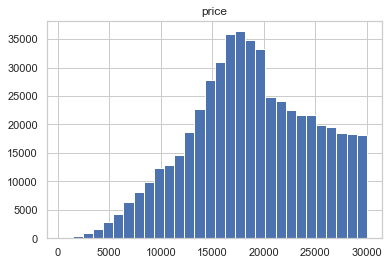

In [34]:
plt.figure(figsize=(10,15))
df_filter.hist(column='price',bins=30)

We rerun the box plot again for price with new filtered data, Now we are analying the price distribution after removing outliers over than 30000.

25%    14950.0
50%    18785.0
75%    23591.0
Name: price, dtype: float64
Minimum of car price is: 484.0
Maximum of car price is: 29999.0


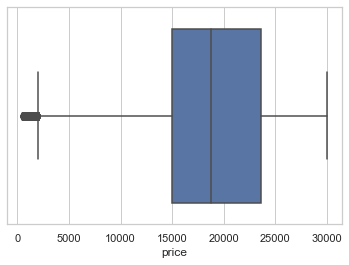

In [35]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_filter["price"])
print(df_filter.describe()['price'][['25%', '50%', '75%']])
print('Minimum of car price is: '+str(df_filter['price'].min()))
print('Maximum of car price is: '+str(df_filter['price'].max()))

Now we would like to find out the price range by different car types. We run the box plot to check the car prices using car types.

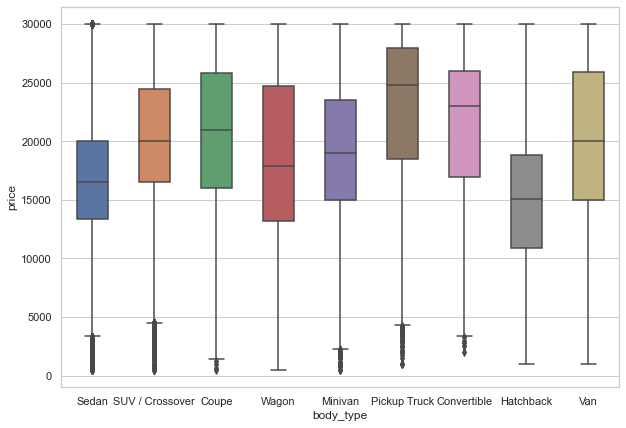

In [67]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="body_type", y="price",data=df_filter,width=.5,saturation=0.75)


#### Distrubtion of Type of Cars (New/Used)
In this section, we will want to take a quick look at the distribution of our data to see, is our "used car data" comprised of all used cars? Or is there a population of the data that is actually "new cars". From a simple count, we can  see that our dataset has the majority (~99%) of our cars being used cars as described in the title, with less than 1% being new.

In [37]:
print('count of new cars: '+str(df_filter['is_new'].values.sum()))
print('count of used cars: '+str((~df_filter['is_new']).values.sum()))
perN=(667/697989)*100
print('percentage of new cars:'+str(perN)+'%')
perO=(697322/697989)*100
print('percentage of old cars:'+str(perO)+'%')

count of new cars: 250
count of used cars: 523794
percentage of new cars:0.09556024521876419%
percentage of old cars:99.90443975478124%


#### Distribution of Car Accidents
We then looked into the number of different types of cars that have accidents or no accidents. We found that 84,706 cars have accidents and out of that, Suv/Crossover and Sedan cars have higher numbers of accidents based on their counts than the other car types. 

In [38]:
print(df_filter['has_accidents'].values.sum())

72828


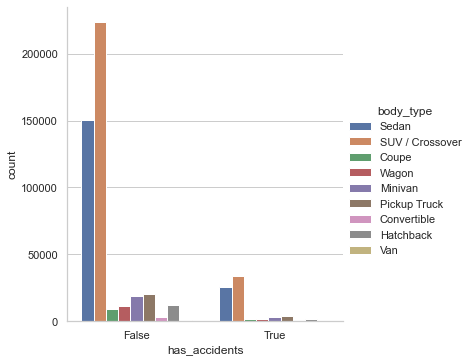

In [39]:
sns.catplot(x="has_accidents", kind="count",hue='body_type', data=df_filter)

#### Distribution of Car count by body types

There could some scientific possibility why SUV/Crossovers and Sedans have higher accident rates, but this mainly could be due to the simple volume of these types of cars in our dataset as shown below in the count plot, indicating that these car types are simply more popular to the consumer.

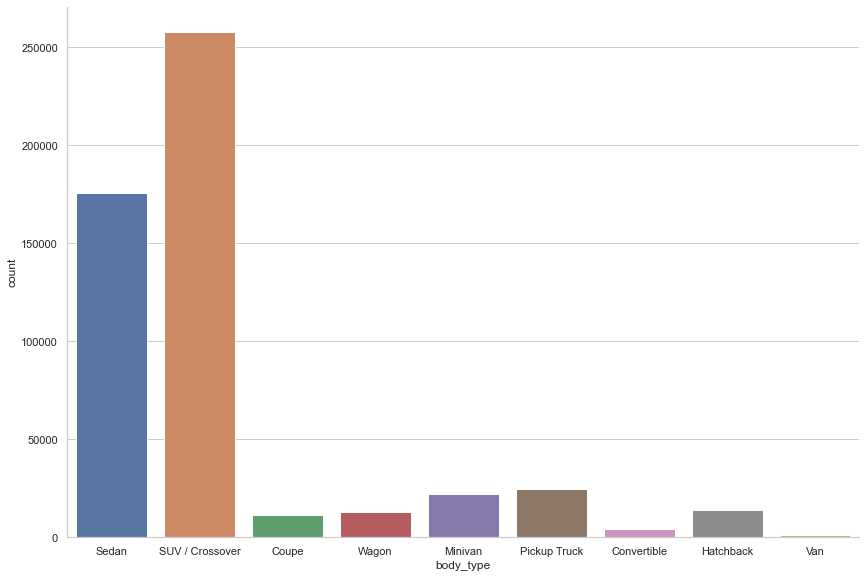

In [40]:
sns.catplot(x="body_type", kind="count",data=df_filter,height=8, aspect=1.5)

#### Distrubtion of Frame Damaged Cars
We next wanted to look into the attribute that provides insight into whether the car was damaged or not as it is more than common sense to assume that a damaged car is priced lower than a non-damaged car. From the visualization of our plots below, we can see that almost *all* cars are not damaged while only a small portion of our cars are damaged. 

In [41]:
df_filter['frame_damaged'].value_counts()

False    522593
True       1451
Name: frame_damaged, dtype: int64

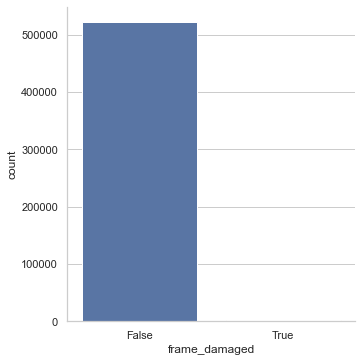

In [42]:
sns.catplot(x="frame_damaged", kind="count", data=df_filter)

#### Correlation check
Now we wanted to check the correlations between the price and all other attributes. 

In [43]:
df_filter.corr(method='spearman')

,city_fuel_economy,daysonmarket,engine_displacement,height,highway_fuel_economy,horsepower,is_new,length,maximum_seating,mileage,owner_count,price,seller_rating,width,year
city_fuel_economy,1.000000,0.002657,-0.793918,-0.625946,0.934146,-0.812206,0.013555,-0.625946,-0.451872,-0.331020,-0.211661,-0.236780,-0.057032,-0.652595,0.318472
daysonmarket,0.002657,1.000000,-0.029349,0.024752,-0.005192,0.002495,0.025871,0.024752,0.026014,-0.129648,-0.083415,0.049026,0.023820,0.048543,0.161309
engine_displacement,-0.793918,-0.029349,1.000000,0.529250,-0.710703,0.758374,-0.015748,0.529250,0.440526,0.294689,0.173363,0.241940,0.018594,0.516860,-0.248386
height,-0.625946,0.024752,0.529250,1.000000,-0.730544,0.425983,-0.004835,1.000000,0.595469,0.181909,0.027878,0.252339,0.033994,0.520669,-0.093747
highway_fuel_economy,0.934146,-0.005192,-0.710703,-0.730544,1.000000,-0.709246,0.010283,-0.730544,-0.465792,-0.271730,-0.157529,-0.273629,-0.053717,-0.584512,0.245070
horsepower,-0.812206,0.002495,0.758374,0.425983,-0.709246,1.000000,-0.016772,0.425983,0.360948,0.192439,0.119542,0.436876,0.049493,0.684263,-0.163395
is_new,0.013555,0.025871,-0.015748,-0.004835,0.010283,-0.016772,1.000000,-0.004835,-0.005751,-0.035133,-0.010059,0.016855,-0.006982,-0.007438,0.031129
length,-0.625946,0.024752,0.529250,1.000000,-0.730544,0.425983,-0.004835,1.000000,0.595469,0.181909,0.027878,0.252339,0.033994,0.520669,-0.093747
maximum_seating,-0.451872,0.026014,0.440526,0.595469,-0.465792,0.360948,-0.005751,0.595469,1.000000,0.167449,0.018200,0.137209,0.009922,0.356315,-0.047118
mileage,-0.331020,-0.129648,0.294689,0.181909,-0.271730,0.192439,-0.035133,0.181909,0.167449,1.000000,0.496063,-0.505436,0.027114,0.091629,-0.719812


#### Correlation check

Now we wanted to check the correlations between the price and all other attributes. From this correlation plot, we can see right off the bat high correlations between city_fuel_economy, and highway_fuel_economy. It could be argued that Collinearity exist between these two variables, but the question really is - are these two even independent variables to begin with since it is a measurement of the same vehicle gas economy at different speeds.

One thing we were really looking for here was any strong correlations with price as high correlation may result in overfitting our model. Luckily, the highest correlation with price was with horsepower at 0.561.


In [65]:
cormat = df_filter.corr()

def triang(cormat, triang='lower'):
    
    if triang == 'upper':
        rstri = pd.DataFrame(np.triu(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,1:]
        rstri.drop(rstri.tail(1).index, inplace=True)
        
    if triang == 'lower':
        rstri = pd.DataFrame(np.tril(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,:-1]
        rstri.drop(rstri.head(1).index, inplace=True) 
 
    rstri.replace(to_replace=[0,1], value='', inplace=True)
    
    return(rstri)

triang(cormat, triang='upper')

,daysonmarket,engine_displacement,height,highway_fuel_economy,horsepower,is_new,length,maximum_seating,mileage,owner_count,price,seller_rating,width,year
city_fuel_economy,-0.031,-0.792,-0.612,0.936,-0.805,0.015,-0.612,-0.43,-0.337,-0.215,-0.206,-0.061,-0.61,0.335
daysonmarket,,0.006,0.027,-0.03,0.015,0.057,0.027,0.024,-0.046,-0.008,0.014,0.026,0.047,0.024
engine_displacement,,,0.517,-0.727,0.819,-0.015,0.517,0.404,0.332,0.208,0.216,0.025,0.46,-0.311
height,,,,-0.738,0.439,-0.004,,0.539,0.187,0.016,0.262,0.038,0.517,-0.065
highway_fuel_economy,,,,,-0.715,0.01,-0.738,-0.433,-0.301,-0.174,-0.238,-0.057,-0.556,0.294
horsepower,,,,,,-0.016,0.439,0.35,0.194,0.126,0.414,0.05,0.616,-0.146
is_new,,,,,,,-0.004,-0.006,-0.027,-0.009,0.016,-0.005,-0.007,0.023
length,,,,,,,,0.539,0.187,0.016,0.262,0.038,0.517,-0.065
maximum_seating,,,,,,,,,0.147,,0.138,0.011,0.392,-0.014
mileage,,,,,,,,,,0.493,-0.567,0.04,0.101,-0.744


To better allow strong correlated attributes to "pop", we next plotted out a heat map. Here we can see the corerlation with price and horsepower a bit clearer. An odd thing we found is that the seller_rating and owner_count don't show strong relationships to car price based on their correlations. Seller_rating could be argued that perhaps car buyers use that as a preliminary metric for where to buy cars, but it's eye-opening to see that the correlation between owner_count and car price is (-0.19). Perhaps it could be said that it's not how many people have owned the car before that determines price, but rather the quality of the car itself.
<br>
<br>
Further analysis a couple strong correlations found below (corr > .70):
<br>
- **length vs height** (corr = 1): this one is very interesting as one would not expect two different car dimensions to be perfectly correlated. This could be due to structural engineering requirements, but that assumption will require further analysis. Since they are perfectly correlated, we will simply remove one since having both in the model do not make sense. 
<br>
- **horsepower vs engine_displacement** (corr = .83): not surprised to see a somewhat high correlation here of .83, but was honestly more surprised there wasn't a higher correlation since one would expect that the bigger the engine... the more horsepower. 


<AxesSubplot:>

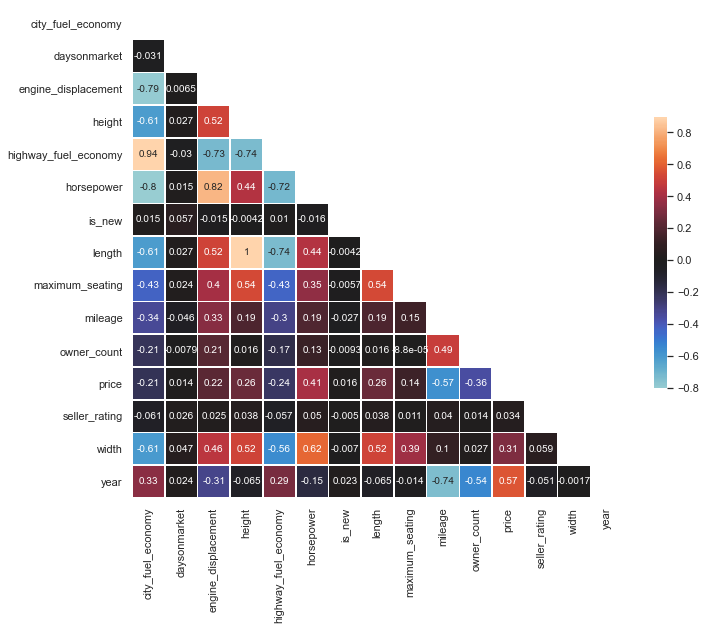

In [66]:
mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(11, 10))
sns.heatmap(cormat, mask=mask, vmax=.9, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

### Visualize Attributes

### Visualization with Raincloud Plot 

The purpose of the graph is to illustrate the impact of accident on the used car price. The rain plot shown here portraits the distribution in combination with the box plot. The green indicates the no-accident cases and the orange the accident. Themedian price of no-accident used car and its first and third quartiles are higher than those of used cars with accidents, the findings that agree with our general intuition of used car purchase.  

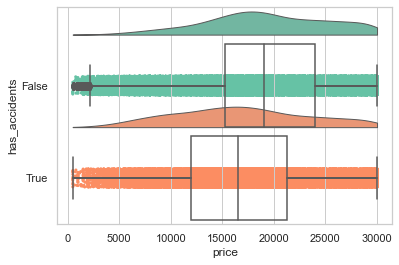

In [47]:
%matplotlib inline
ax = pt.RainCloud(x = 'has_accidents', y = 'price', 
                  data = df_filter, 
                  width_viol =  .5,
                  width_box =  .9,
                  orient = 'h',
                  move = .0)

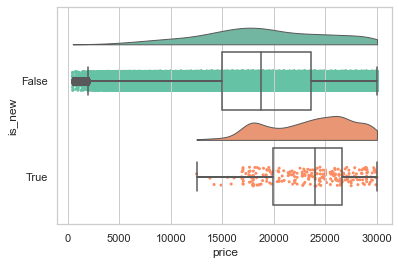

In [49]:
ax = pt.RainCloud(x = 'is_new', y = 'price', 
                  data = df_filter, 
                  width_viol = .5,
                  width_box = .6,
                  orient = 'h',
                  move = .0)

Our inquisitiveness drives us to know the price difference between the usedcar and the new one. The median price of used car stands at 18000, where as that of new car at 24000. In percentage term, the median price of new car is 33% higher than that of used one. Please note that the population of new cars in the used car market is low which is manifested in the distribution, but the numbers are adequate to make this comparison. 

#### Visualize the horsepower and price with Scatter plot using Seaborn lmplot.

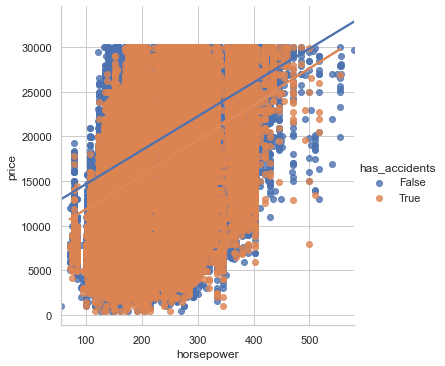

In [54]:

sns.lmplot(x='horsepower', y='price', hue='has_accidents', data=df_filter)

A question crosses our mind whether the cars with higher horsepower are more expensive and prone to accidents.It shows a positive relationship between price and horsepower. However, no clear evidence can be observed from the visualization as the distributions are evenly super imposed.

#### Visualize the engine_displacement and price with accidents using Seaborn Scatterplot.

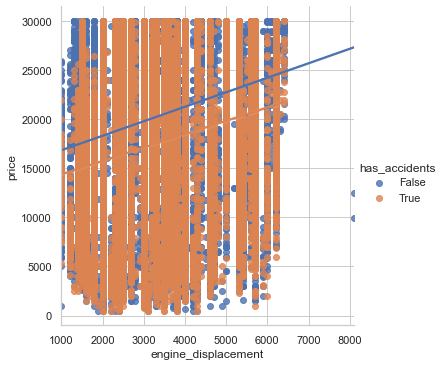

In [60]:

sns.lmplot(x='engine_displacement', y='price', hue='has_accidents', data=df_filter)

We want to see if there’s correlation between engine_displacement, car_price and its accident rate. It’s hard to conclude any such correlation based on the diagram below.

#### Visualize the highway_fuel_economy and price with accidents using Seaborn Scatterplot.

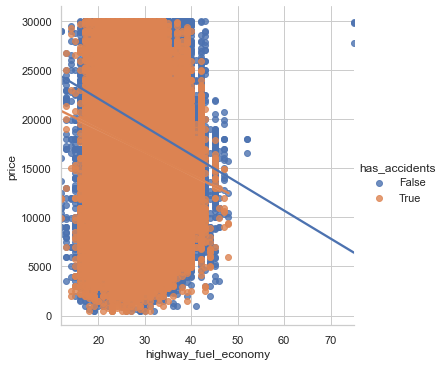

In [55]:

sns.lmplot(x='highway_fuel_economy', y='price', hue='has_accidents', data=df_filter)

In addition, we want to investigate and see if “highway_fuel_economy” has any correlation with either “car_price” or “accidents”.  We can see from the diagram that there’s a negative correlation between the “highway_fuel_economy” and “car_price”. In other words, the higher the car_price, the lower the MG (miles per gallon) for “highway_fuel_econonmy”. This could be onepossible conclusion as fuel-efficient vehicles tend to have higher asking prices. However, there’s no clear correlation between “highway_fuel_economy” and the vehicles’ past “accident history”. Therefore, we can not make any conclusion on thispart.

#### Visualize the relationship between mileage and price with Scatter plot using Seaborn lmplot.

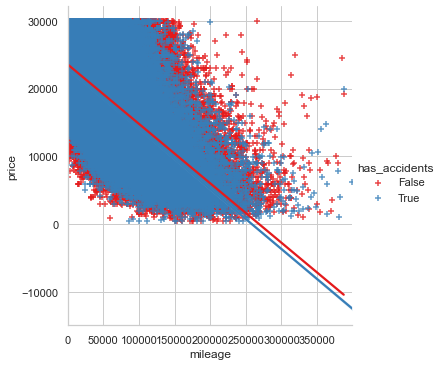

In [56]:

sns.lmplot(x='mileage', y='price', hue='has_accidents',palette="Set1", markers='+', data=df_filter)

Finally, we would like to investigate to see if there’s any correlation between the used car “price” either its “mileage” or “accidents history”. We can see that there’s a negative correlation between a car’s asking price and its mileage. This indicates that used cars tend to have higher asking prices when the mileage is lower. In contrast, the higher the used car mileage the lower the asking price will be.There’s also a strong correlation between car’s asking price and its accident history. We noticed in the diagram that car’s asking price decreases when the car has prior accidents. In comparison, used cars that has no prior accident history tendto have higher asking prices. 

### Explore Joint Attributes

When it comes to joint attributes, we would like to see if there's correlation between "car body type" and "city_fuel_economy".

First, we asked: 

*What's the most popular **city fuel economy** for used SUV, pickup Truck, sedan and convertible?* (Please see Diagram 1)
* The most popular "city fuel economy" for **used Car** overall is 18 mile
* The most popular "city fuel economy" for **used SUV** is 22 mile
* The most popular "city fuel economy" for **used Pickup Truck** is 15 mile
* The most popular "city fuel economy" for **used Sedan** is 28 mile
* The most popular "city fuel economy" for **used convertible** is 20 mile

<AxesSubplot:title={'center':'Diagram 1'}, xlabel='city_fuel_economy', ylabel='total number of used car sold'>

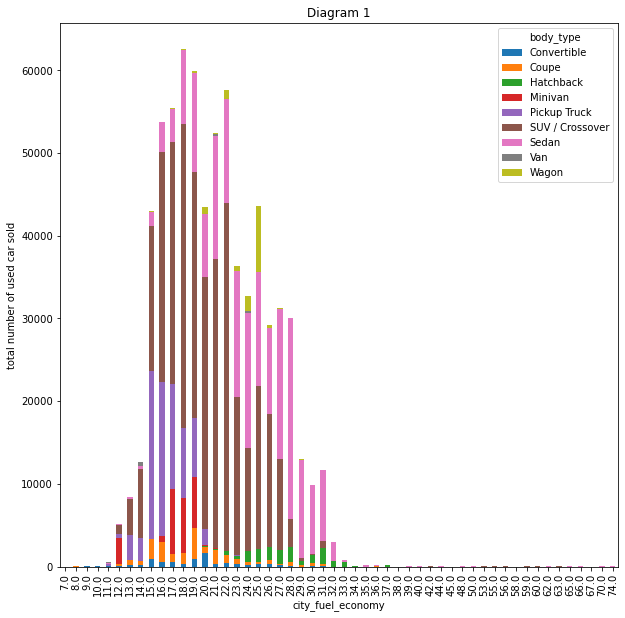

In [61]:
df_graph1 = df_final.groupby(['city_fuel_economy', 'body_type'])['body_type'].count().unstack().fillna(0)
df_graph1.plot(figsize=(10,10), kind="bar", stacked = True, ylabel = "total number of used car sold", title = "Diagram 1")

Another question we asked was:

*What's the **highest amount of seating** people are looking for when looking to buy a used car?* (Please see Diagram 2)

* The **most popular** number of seats for used cars is 5 seats
* The **second most popular** number of seats for used car is 6 seats
* When buying a Sedan, customers mostly are looking for 5 seats.

<AxesSubplot:title={'center':'Diagram 2'}, xlabel='maximum_seating', ylabel='total number of used car sold'>

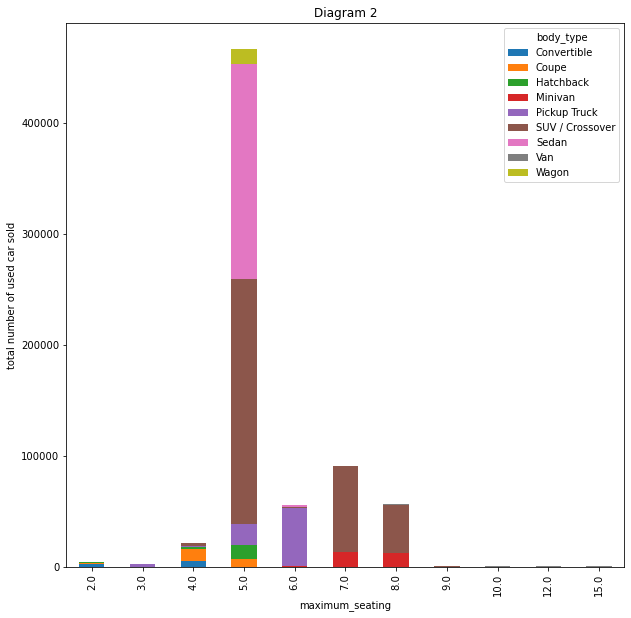

In [63]:
df_graph2 = df_final.groupby(['maximum_seating', 'body_type'])['body_type'].count().unstack().fillna(0)
df_graph2.plot(figsize=(10,10), kind="bar", stacked = True, ylabel = "total number of used car sold", title = "Diagram 2")

### Explore Attributes and Class
we are using price (for regression), has_accidents(for logistic regression) and body_type(for multiclass classifications) as the response variables. In this section, we will try to find some interesting relations involving these features. 

'has-accidents' and 'is_new' are two booleans variables in our final dataset. We could have either or these these two values for the binary classification. But has_accidents feature is more balanced (false: 87% and true:13%) than that of is_new. That is the another driver, besides what is stated in the Business Understanding section, why we leaned on has_accidents for the binary response variable. However, we could have used is_new for the response variable. In that case, we should downscale or upscale, though the downscaling is preferred, training data, which would be an additional step. 

In [64]:
print('--attribute counts of is_new--')
print(df_final['is_new'].value_counts())

print('--attribute counts of has_accidents--')
print(df_final['has_accidents'].value_counts())

--attribute counts of is_new--
False    697322
True        667
Name: is_new, dtype: int64
--attribute counts of has_accidents--
False    613283
True      84706
Name: has_accidents, dtype: int64


One may think the drivers of Sendan, Minivan or wagon may be more cautious that those who drive SUV or Pickup Truck. But at least based on used car market as presented in this visual, there is not much difference in the driving behavior amoung drives of different body types. However, the drivers of coupe and convertible exhibit restriant while on the road because the damage of their vehicle would cost them dearly.

[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Coupe'),
 Text(2, 0, 'SUV / Crossover'),
 Text(3, 0, 'Pickup Truck'),
 Text(4, 0, 'Wagon'),
 Text(5, 0, 'Minivan'),
 Text(6, 0, 'Convertible'),
 Text(7, 0, 'Hatchback'),
 Text(8, 0, 'Van')]

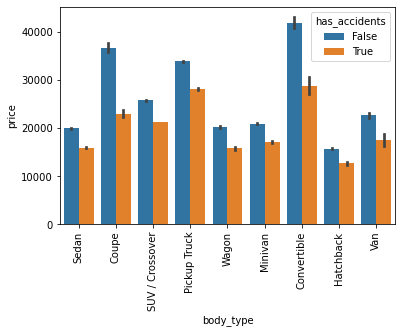

In [65]:
Price_bodytype_accidents = sns.barplot(x="body_type", y="price", hue = "has_accidents",data=df_final)
Price_bodytype_accidents.set_xticklabels(Price_bodytype_accidents.get_xticklabels(), rotation=90)

Coupe, SUV/Crossover, Convertible and Sedan have many outliers, whereas Wagon, Minivan and Vad do not have any outlier. In median used car price of 9 body types are with a close band. 

[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Coupe'),
 Text(2, 0, 'SUV / Crossover'),
 Text(3, 0, 'Pickup Truck'),
 Text(4, 0, 'Wagon'),
 Text(5, 0, 'Minivan'),
 Text(6, 0, 'Convertible'),
 Text(7, 0, 'Hatchback'),
 Text(8, 0, 'Van')]

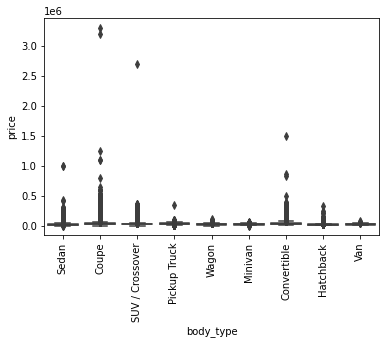

In [66]:
Price_bodytype = sns.boxplot(x="body_type", y="price", data=df_final)
Price_bodytype.set_xticklabels(Price_bodytype.get_xticklabels(), rotation=90)

Sedan, SUV/Crossover, Pickup Truck stay in the market much loger than Coupe, Wagon and Hackback do. It is surprise to see that Coupe, though it is an expensive category car, sells faster Sedan, which we believe a common people's car. Most likely supply demand or mispricing is causing this anamoly. 

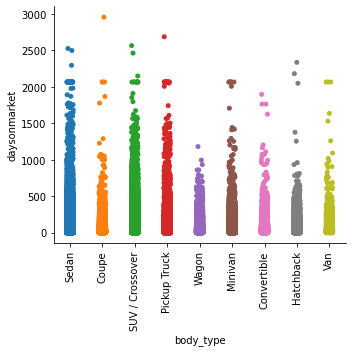

In [67]:
plot = sns.catplot(x="body_type", y="daysonmarket", data=df_final)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

We may think that the used cars having accidents will stay longer in the market, but that is not the case with an exception of Van. 

[Text(0, 0, 'Sedan'),
 Text(1, 0, 'Coupe'),
 Text(2, 0, 'SUV / Crossover'),
 Text(3, 0, 'Pickup Truck'),
 Text(4, 0, 'Wagon'),
 Text(5, 0, 'Minivan'),
 Text(6, 0, 'Convertible'),
 Text(7, 0, 'Hatchback'),
 Text(8, 0, 'Van')]

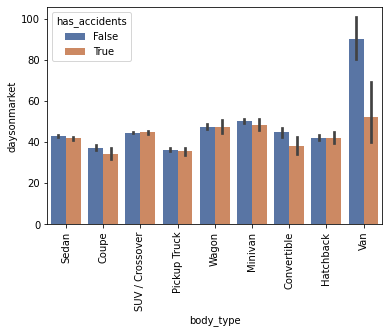

In [68]:
Plt3 = sns.barplot(x="body_type", y="daysonmarket", hue = "has_accidents", palette="deep",data=df_final)
Plt3.set_xticklabels(Plt3.get_xticklabels(), rotation=90)

### New Features

We further group numerical predictors, including "price", to help us to gain more insight. 

This new feature is created using the attribute 'price'. 
We divide price into different price groups as following:

* "<5000"          : price < 5000
* "5000-10000"     : 5000 <= price <= 10000
* "10000-15000"    : 10000 < price <= 15000
* "15000-20000"    : 15000 < price <= 20000
* "20000-25000"    : 20000 < price <= 25000
* "25000 and over" : price > 25000

In [78]:
price_group = []
for price in df_final["price"]:
    if price < 5000:
        price_group.append("<5000")
    elif 5000 <= price <= 10000:
        price_group.append("5000-10000")
    elif 10000 < price <= 15000:
        price_group.append("10000-15000")
    elif 15000 < price <= 20000:
        price_group.append("15000-20000")
    elif 20000 < price <= 25000:
        price_group.append("20000-25000")
    else:
        price_group.append("25000 and over")

In [79]:
new_df_price = df_final.copy()
new_df_price["price_group"] = price_group
del new_df_price["price"]


Obervations after we had used the new price group for data analysing:
* Over 65% of customers spent 25000 and more when buying a used Pickup truck
* Over 50% of customers spent over 20000 for a used SUV
* Over 50% of customers spent between 10000-20000 when buying a used sedan

<AxesSubplot:xlabel='body_type'>

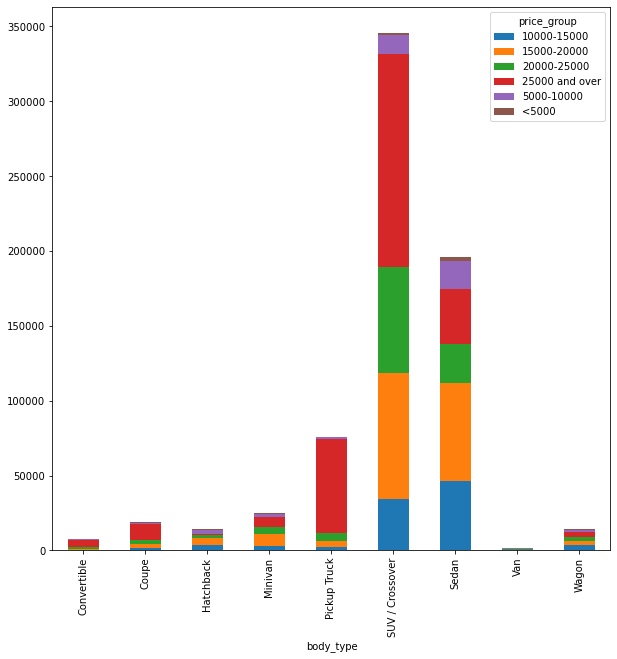

In [80]:
df_price = pd.crosstab(new_df_price.body_type, new_df_price.price_group)
df_price.plot(figsize=(10,10), kind="bar", stacked = True)

### Exceptional Work

In this section, we will use *one hot encoding* to encode the data set below

In [81]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

First, we encode the categorical features as numbers. (see below function) 

In [82]:
def number_encode_features(df_final):
    result = df_final.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

Below shows a snap shot of what the final data looks like after categorical data has been encoded.
You can see the body type is in a numerical representation, instead of a string (object) type, before being encoded.

As indicated in the heatmap in the sample statistics (above) section, in the future we want to further explore the strong correlation between "price" and "body_type".

In [83]:
encoded_data = number_encode_features(df_final)
encoded_data

(         body_type  city_fuel_economy  daysonmarket  engine_displacement  \
 38               6               27.0            55               1500.0   
 40               1               18.0            36               3500.0   
 41               5               18.0            27               3600.0   
 45               5               15.0            27               3600.0   
 47               5               18.0            24               3600.0   
 ...            ...                ...           ...                  ...   
 3000026          5               26.0            32               1400.0   
 3000028          5               26.0            17               2500.0   
 3000031          6               26.0            17               2500.0   
 3000034          4               18.0            89               3500.0   
 3000039          5               26.0            17               2500.0   
 
          frame_damaged  has_accidents  height  highway_fuel_economy  \
 3